# Section 2

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import scanpy as sc
import dynamo as dyn
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy.stats import pearsonr
import pingouin as pg
histone_palette = { #Define a standard color for each histone mark
    'H3K27ac':sns.color_palette('colorblind')[0],
    'H3K9ac':sns.color_palette('colorblind')[1],
    'H3K4me3':sns.color_palette('colorblind')[2],
    'H3K4me1':sns.color_palette('colorblind')[3],
    'H3K9me3':sns.color_palette('colorblind')[4],
    'H3K27me3':sns.color_palette('colorblind')[5],
    'H3K36me3':sns.color_palette('colorblind')[6],
}
dyn.configuration.set_pub_style() # Define publication style quality for figures

In [2]:
# Load data
adata_genes = sc.read_h5ad('../results/adata_genes.h5ad')
adata_gaps = sc.read_h5ad('../results/adata_gaps.h5ad')
adata_whole_genome = sc.read_h5ad('../results/adata_whole_genome.h5ad')
adata_hm27_450_cpgs = sc.read_h5ad('../results/adata_hm27_450_cpgs.h5ad')
adata_horvath_cpgs = sc.read_h5ad('../results/adata_horvath_cpgs.h5ad')
adata_methylation_AltumAge_simulations = sc.read_h5ad('../results/adata_methylation_AltumAge_simulations.h5ad')
adata_genes_gaussian_noise = sc.read_h5ad('../results/adata_genes_gaussian_noise.h5ad')
adata_genes_imputation = sc.read_h5ad('../results/adata_genes_imputation.h5ad')
adata_gaps_imputation = sc.read_h5ad('../results/adata_gaps_imputation.h5ad')
adata_whole_genome_imputation = sc.read_h5ad('../results/adata_whole_genome_imputation.h5ad')
adata_hm27_450_cpgs_imputation = sc.read_h5ad('../results/adata_hm27_450_cpgs_imputation.h5ad')
adata_horvath_cpgs_imputation = sc.read_h5ad('../results/adata_horvath_cpgs_imputation.h5ad')

## Figure 2

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `

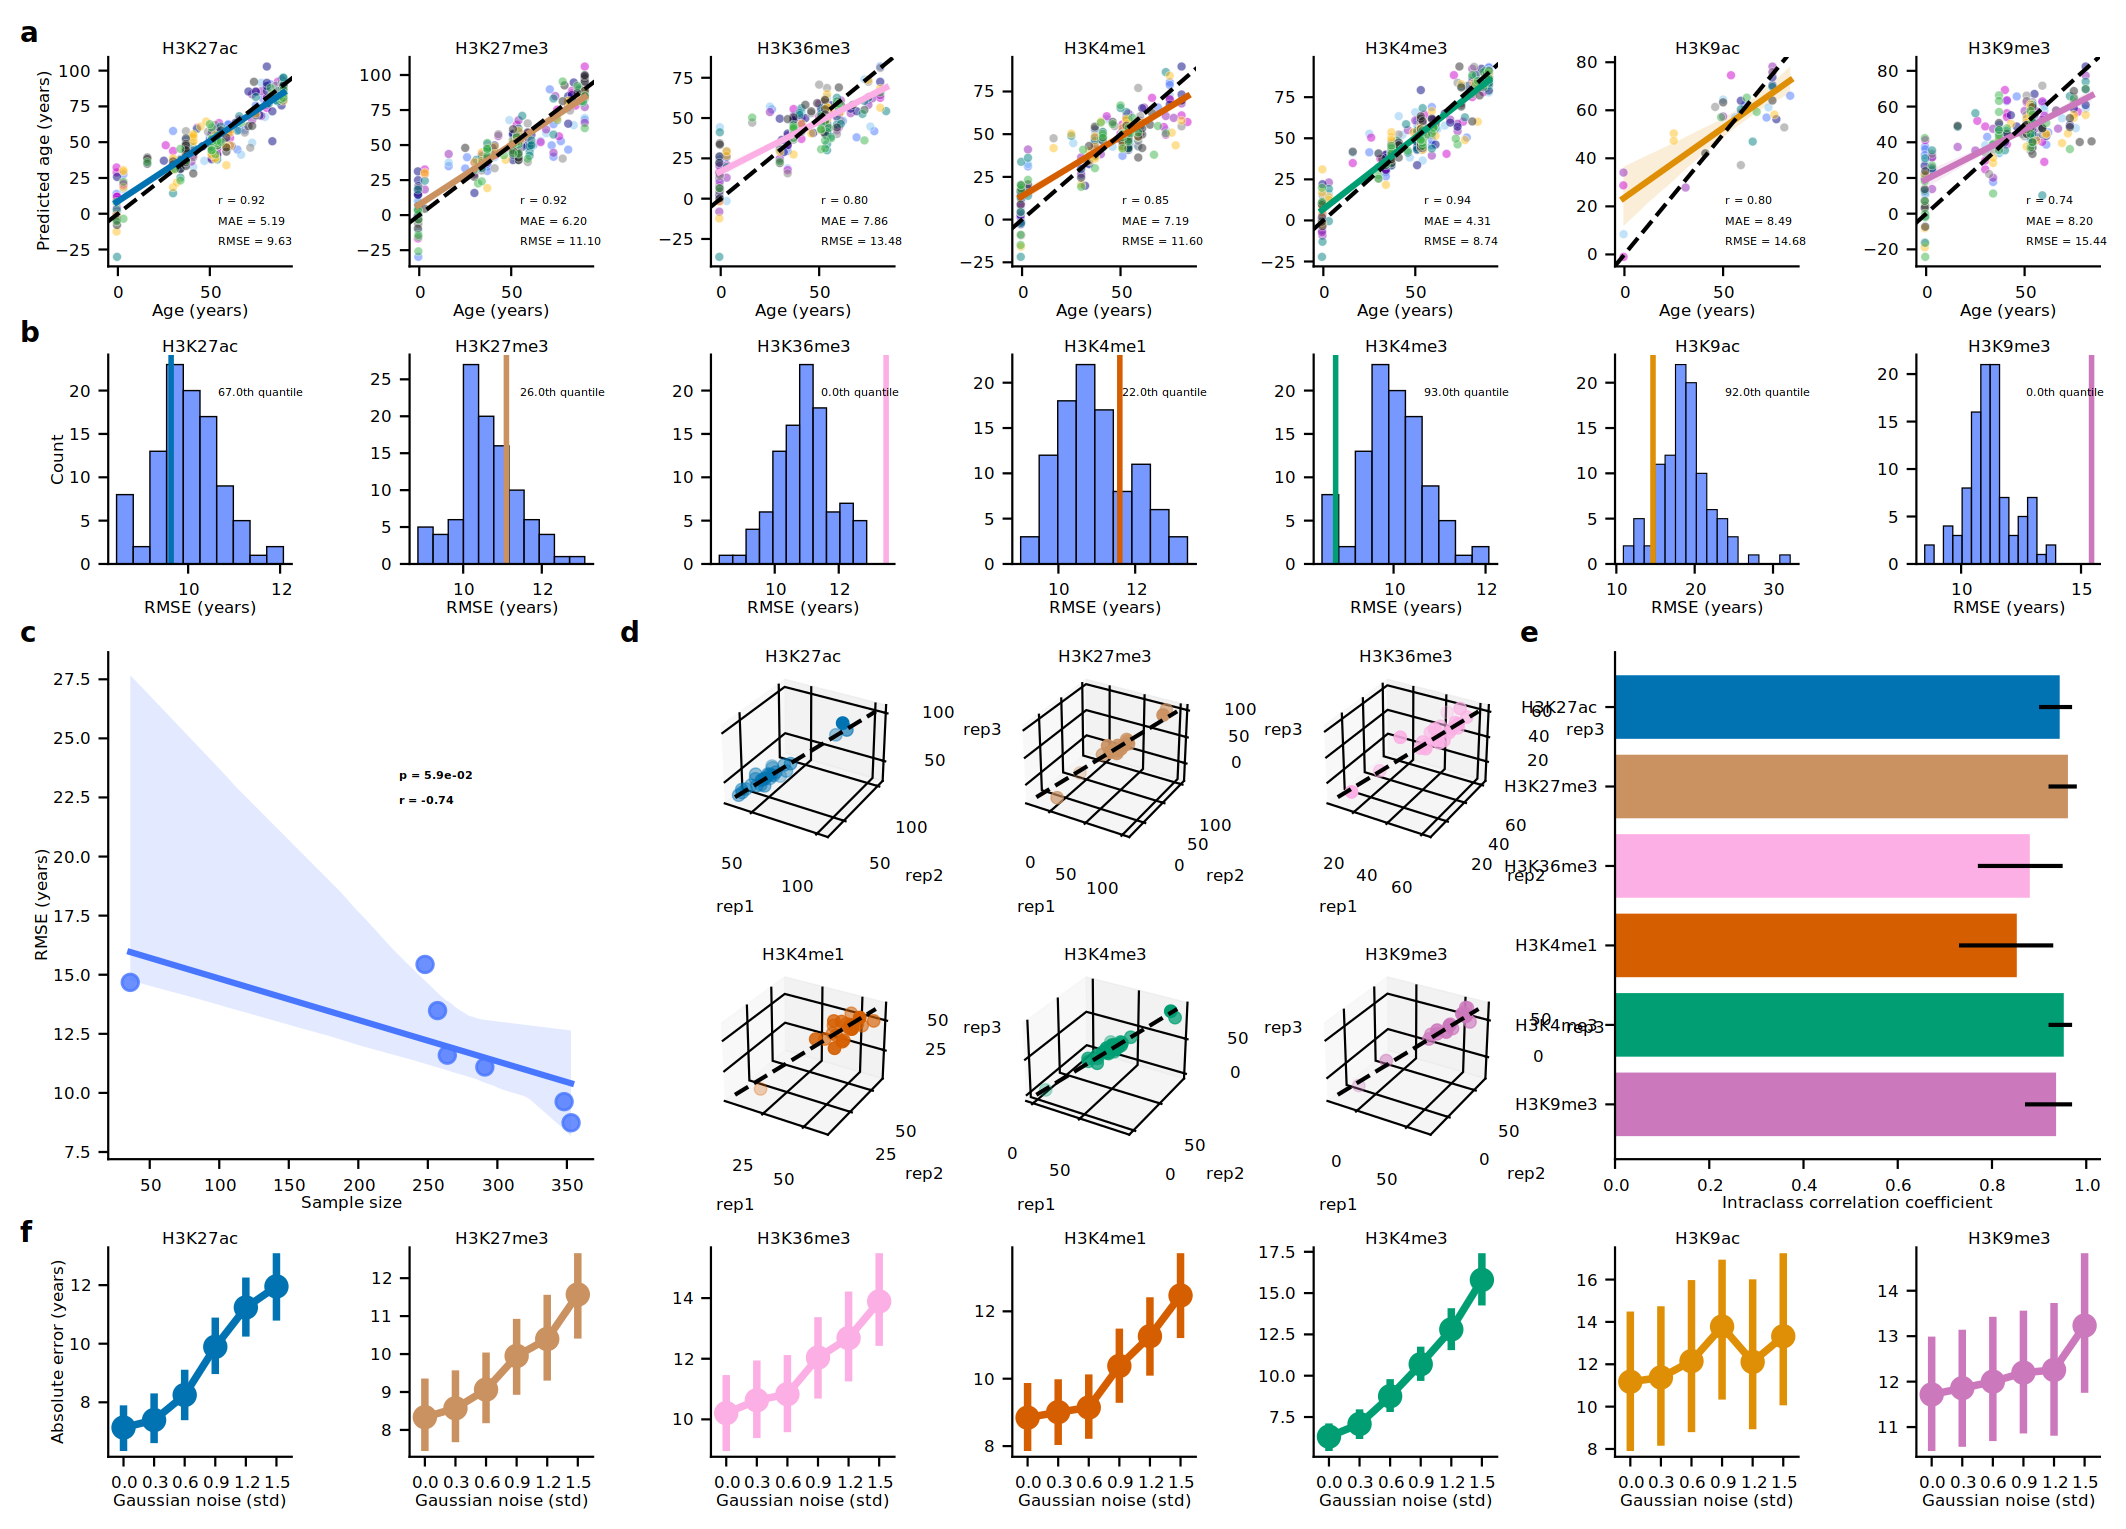

In [4]:
# Function to get the axis location
def get_axis_location(axis_lim, d=0.5):
    loc = (axis_lim[1] - axis_lim[0]) * d + axis_lim[0]
    return loc

# Defining figure rows and columns
nrows = 5
ncols = 7

# Calculating figure height and width
fig_height = nrows * 1.5
fig_width = ncols * 1.5

# Creating the figure and grid spec
fig = plt.figure(figsize=(fig_width, fig_height))
gs = GridSpec(nrows=nrows, ncols=ncols)

# Adding text labels to the figure
fig.text(0, (nrows - 0) / nrows - 0.01, 'a', size=10, weight="bold")
fig.text(0, (nrows - 1) / nrows - 0.01, 'b', size=10, weight="bold")
fig.text(0, (nrows - 2) / nrows - 0.01, 'c', size=10, weight="bold")
fig.text(2 / 7, (nrows - 2) / nrows - 0.01, 'd', size=10, weight="bold")
fig.text(5 / 7, (nrows - 2) / nrows - 0.01, 'e', size=10, weight="bold")
fig.text(0, (nrows - 4) / nrows - 0.01, 'f', size=10, weight="bold")

# First loop to create scatter and regression plots for each histone
for i, histone in enumerate(np.unique(adata_genes.obs.histone)):
    # Creating subplot, configuring title and spines
    ax = fig.add_subplot(gs[0, i])
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Extracting and calculating required data
    adata = adata_genes[adata_genes.obs.histone == histone]
    y = adata.obsm['cv_test_df'].sum(axis=1)
    x = adata.obs['age']
    corr = round(pearsonr(x, y)[0], 2)
    mae = round(np.median(np.abs(x - y)), 2)
    rmse = round(np.sqrt(np.mean(np.abs(x - y) ** 2)), 2)
    
    # Plotting regression and scatter plots
    sns.regplot(x=x, y=y, scatter=False, color=histone_palette[histone], ax=ax)
    for fold in range(adata.obsm['cv_test_df'].shape[1]):
        y = adata.obsm['cv_test_df'].iloc[:, fold]
        sns.scatterplot(x=x, y=y, alpha=0.5, s=10, legend=False, ax=ax)
    
    # Adding text for correlation, MAE, RMSE
    x_legend_loc = 0.6
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.3), 'r = ' + '{:.2f}'.format(corr))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.2), 'MAE = ' + '{:.2f}'.format(mae))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.1), 'RMSE = ' + '{:.2f}'.format(rmse))
    
    # Setting labels
    if i == 0:
        ax.set_ylabel('Predicted age (years)')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel('Age (years)')
    
    # Plotting dashed line
    ax.autoscale(False)
    ax.plot([-20, 120], [-20, 120], linestyle='dashed', color='black')
    
# Additional loops to generate different types of plots for various analyses
# Similar to the first loop, these loops create subplots and handle data extraction, calculation, and plotting
    
for i, histone in zip(range(len(np.unique(adata_genes.obs.histone))), np.unique(adata_genes.obs.histone)):
    ax = fig.add_subplot(gs[1, i])
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    adata = adata_genes[adata_genes.obs.histone == histone]
    y = adata.obsm['cv_test_df'].sum(axis=1)
    x = adata.obs['age']
    error = np.sqrt(np.mean(np.abs(x - y)**2))   
    error = round(error,2)
    rs = []
    for sim in list(adata_methylation_AltumAge_simulations.obsm.keys()):   
        if histone in sim and 'test_df' in sim:
            y_hat = adata_methylation_AltumAge_simulations.obsm[sim].dropna(how='all').sum(axis=1)
            y = adata_methylation_AltumAge_simulations.obs['age'][y_hat.index]
            r = np.sqrt(np.mean(np.abs(y_hat - y)**2))
            rs += [r]
        else:
            continue
    sns.histplot(np.array(rs), ax=ax)
    ax.autoscale(False, axis='y')
    ax.vlines(error, ymin=0, ymax=100, color=histone_palette[histone], linewidth=2)
    quantile = round(np.sum(error < np.array(rs))/len(rs) * 100, 0)
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.8), '{}'.format(quantile) + 'th quantile')
    if i == 0:
        ax.set_ylabel('Count')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel("RMSE (years)")
                
for i, histone in enumerate(np.unique(adata_genes_gaussian_noise.obs.histone)):
    ax = fig.add_subplot(gs[4, i])
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    adata = adata_genes_gaussian_noise[adata_genes_gaussian_noise.obs.histone == histone]
    
    gaussian_noise = [0, 0.3, 0.6, 0.9, 1.2, 1.5]
    
    errors = []
    noises = []
    
    for noise in gaussian_noise:
        y_hat = adata.obsm[str(noise)+'cv_test_df'].sum(axis=1)
        y_std = adata.obsm[str(noise)+'cv_test_std_df'].sum(axis=1)
        error = list(np.abs(adata.obs['age'] - y_hat))
        
        errors += error
        noises += [noise]*len(error)
        
    sns.pointplot(x=noises, y=errors, color=histone_palette[histone], ax=ax)
    if i == 0:
        ax.set_ylabel('Absolute error (years)')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel('Gaussian noise (std)')

    
histones = list(np.unique(adata_genes.obs['histone']))
histones.remove('H3K9ac') #doesnt have duplicates
y_pos = np.arange(len(histones))
iccs = []
icc_ci_lower = []
icc_ci_higher = []
for k in range(len(histones)):
    histone = histones[k]
    adata_histone = adata_genes[adata_genes.obs['histone'] == histone]
    experiments_with_duplicates = adata_histone.obs.groupby(by='experiment_accession').count()[adata_histone.obs.groupby(by='experiment_accession').count().iloc[:,0] == 3].index.tolist()
    icc_df = pd.DataFrame(adata_histone.obs.experiment_accession)
    icc_df['pred_age'] = adata_histone.obsm['cv_test_df'].sum(axis=1).tolist()
    icc_df = icc_df[[accession in experiments_with_duplicates for accession in icc_df['experiment_accession'].tolist()]]
    icc_df['batch'] = 0
    for i in range(icc_df.shape[0]):
        if i == 0:
            icc_df['batch'].iloc[i] = 1
            continue
        previous_batch = np.sum(icc_df.iloc[i]['experiment_accession'] == np.array(icc_df.iloc[:i]['experiment_accession']))
        icc_df['batch'].iloc[i] = previous_batch + 1
        
    ax = fig.add_subplot(gs[2+k//3, 2+k%3], projection='3d')
    line = np.linspace(icc_df.pred_age.min(), icc_df.pred_age.max(), 100)
    ax.plot3D(line, line, line, 'black', linestyle="dashed")

    # Data for three-dimensional scattered points
    zdata = icc_df[icc_df.batch == 1].sort_values('experiment_accession').pred_age
    xdata = icc_df[icc_df.batch == 2].sort_values('experiment_accession').pred_age
    ydata = icc_df[icc_df.batch == 3].sort_values('experiment_accession').pred_age
    ax.scatter3D(xdata, ydata, zdata, c=histone_palette[histone])
    ax.set_xlabel('rep1')
    ax.set_ylabel('rep2')
    ax.set_zlabel('rep3')
    ax.set_title(histone)
        
    icc = pg.intraclass_corr(data=icc_df, targets='experiment_accession', raters='batch', ratings='pred_age')
    iccs += [icc.iloc[2][2]]
    icc_ci_lower += [icc.iloc[2][7][0]]
    icc_ci_higher += [icc.iloc[2][7][1]]

lower_error = np.abs(np.array(icc_ci_lower) - np.array(iccs))
higher_error = np.abs(np.array(icc_ci_higher) - np.array(iccs))

ax = fig.add_subplot(gs[2:4, 5:7])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.barh(y_pos, iccs, align='center', xerr=(lower_error, higher_error), color=[histone_palette[histone] for histone in histones]) #xerr=error
ax.set_yticks(y_pos, labels=histones)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Intraclass correlation coefficient')

ax = fig.add_subplot(gs[2:4, 0:2])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

histones = list(np.unique(adata_genes.obs['histone']))
errors = []
sample_sizes = []
for histone in histones:
    adata = adata_genes[adata_genes.obs.histone == histone]
    y_hat = adata.obsm['cv_test_df'].sum(axis=1)
    y_std = adata.obsm['cv_test_std_df'].sum(axis=1)
    error = np.sqrt(np.mean((adata.obs['age'] - y_hat)**2))
    errors += [error]
    sample_sizes += [adata.shape[0]]
    
sns.regplot(x=sample_sizes, y=errors, scatter=True, ax = ax)
ax.set_xlabel('Sample size')
ax.set_ylabel('RMSE (years)')
corr, p_value = pearsonr(sample_sizes, errors)   
corr = round(corr,2)
x_legend_loc = 0.6
ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.75), 'p = ' + '{:0.1e}'.format(p_value), weight='bold')
ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.7), 'r = ' + '{:.2f}'.format(corr), weight='bold')

# Tightening layout and displaying the plot
plt.tight_layout()
plt.show()

# Saving the figure as a PDF file
fig.savefig("../figures/figure2.pdf", bbox_inches='tight')

# Returning the figure object
fig

## Supplementary Figure 2

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `

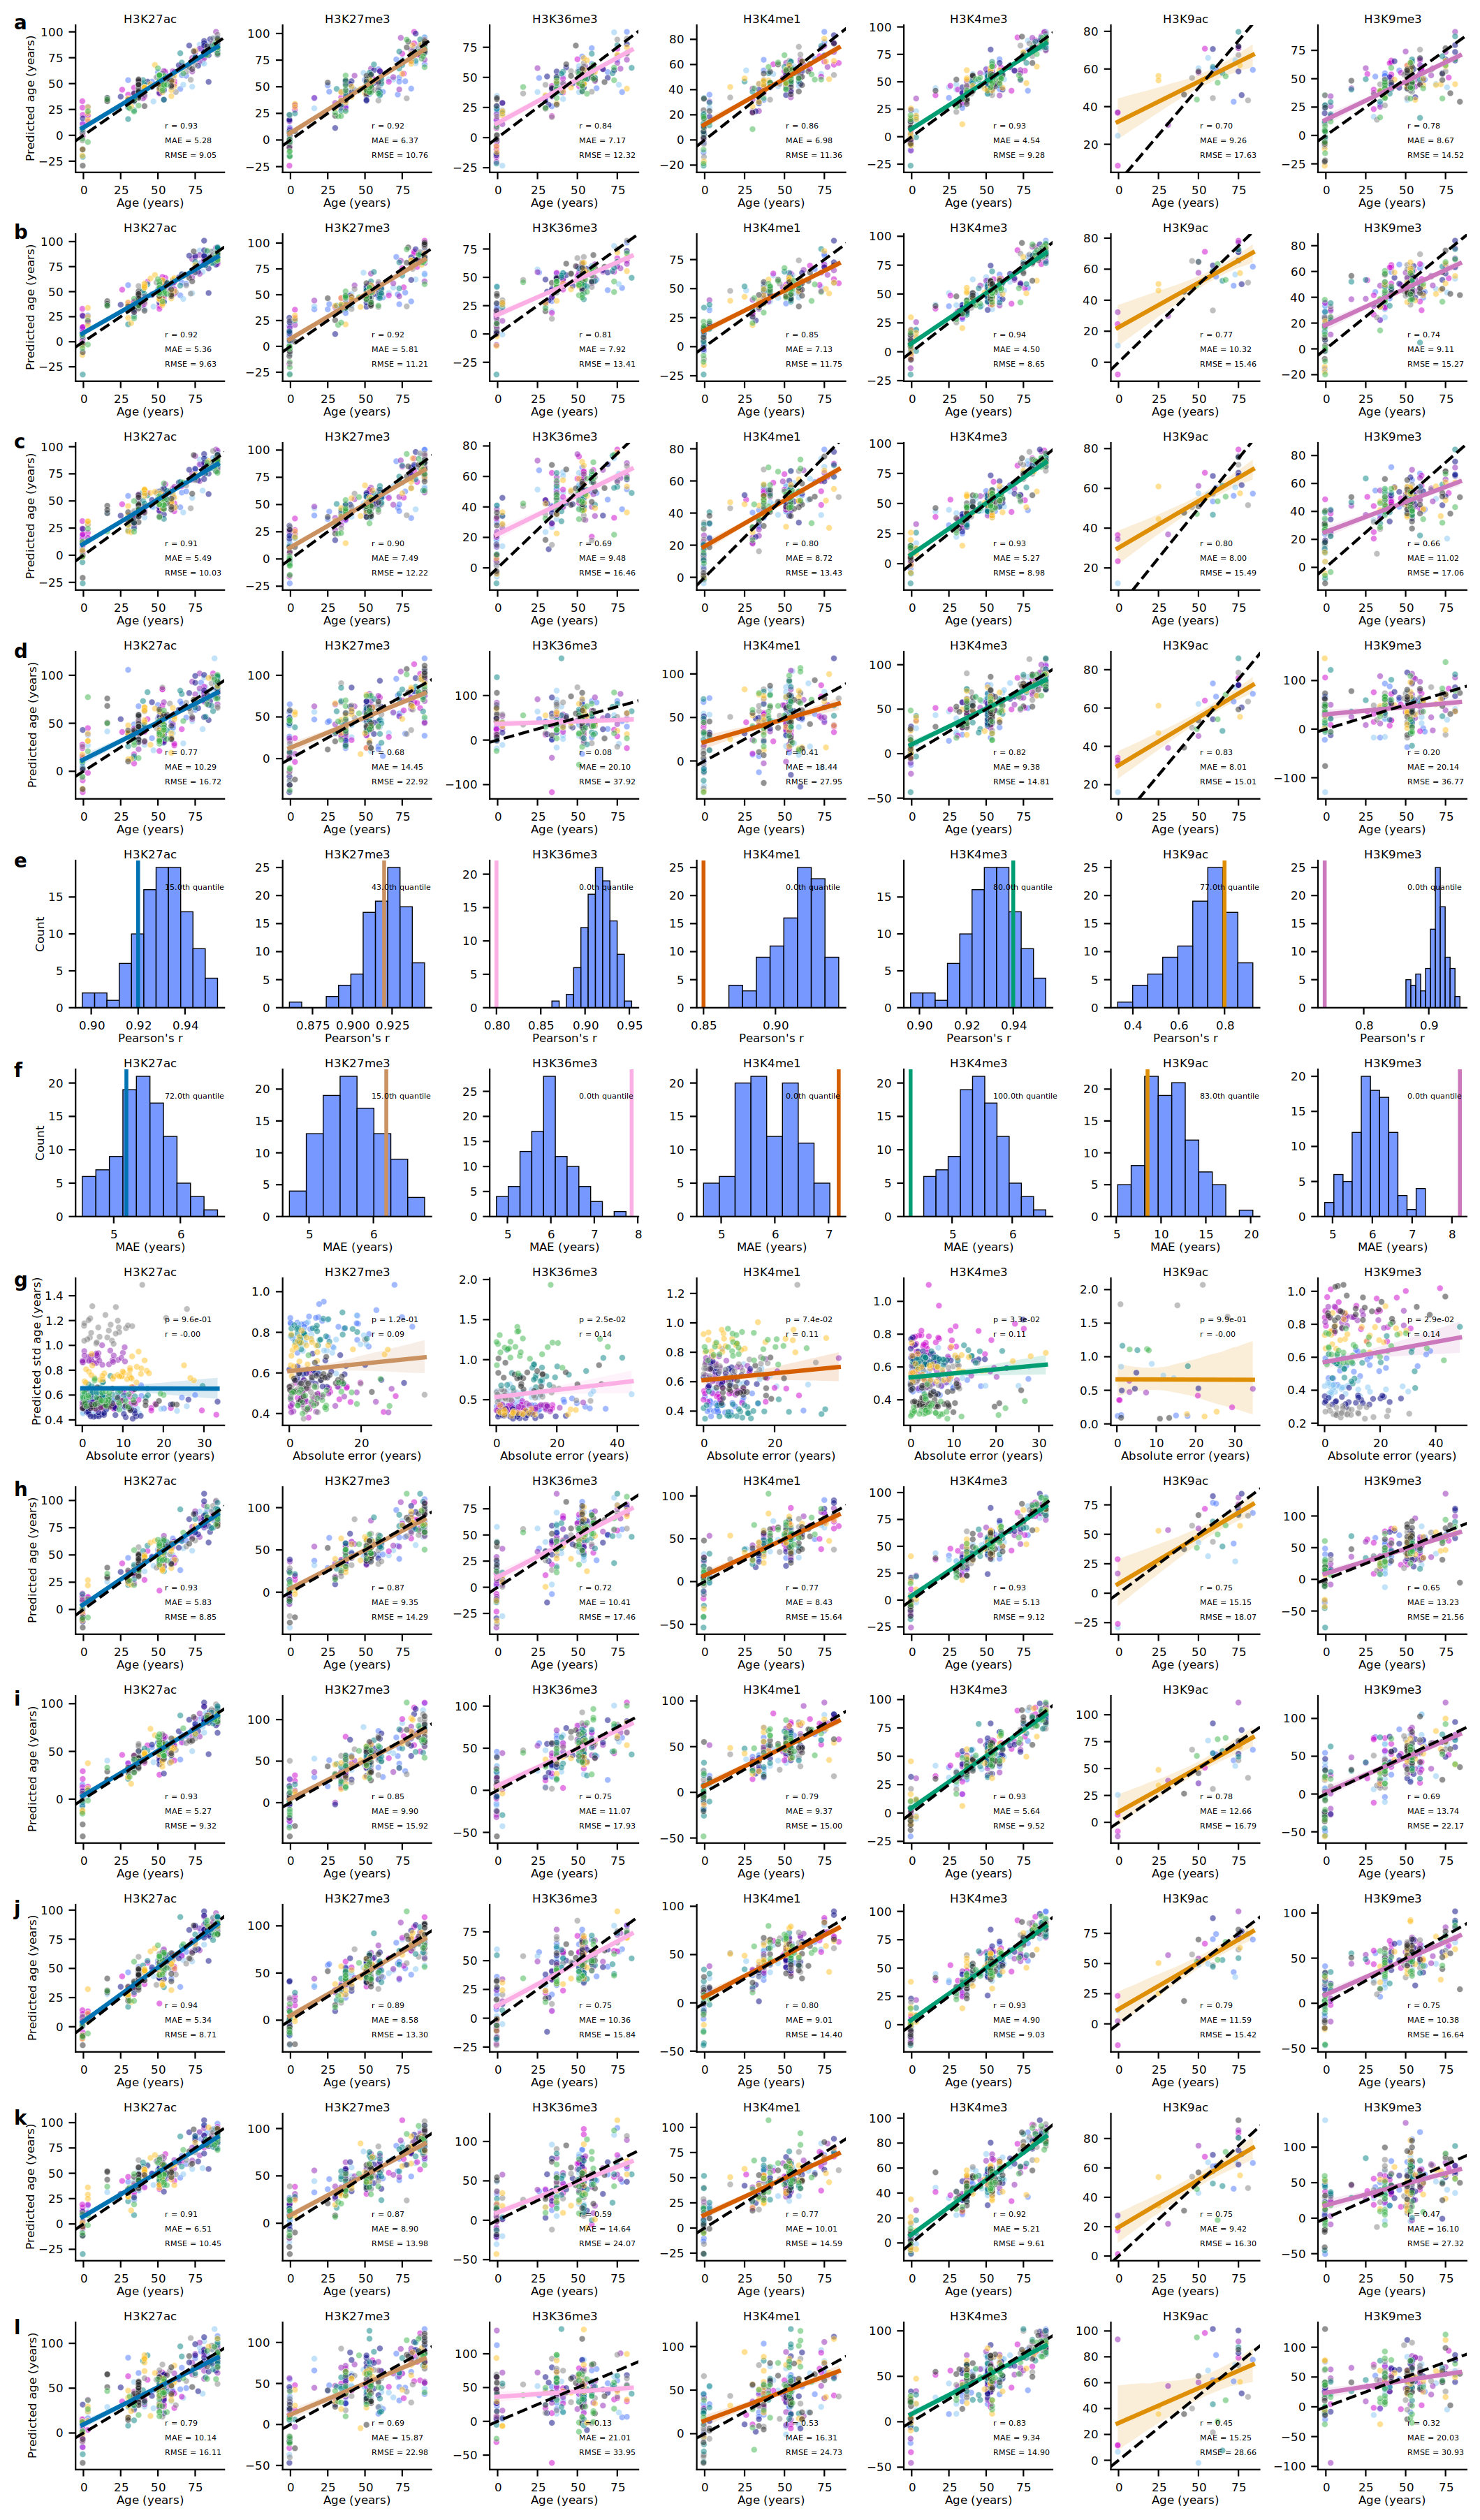

In [5]:
# Function to get the axis location
def get_axis_location(axis_lim, d=0.5):
    loc = (axis_lim[1] - axis_lim[0]) * d + axis_lim[0]
    return loc

# Defining figure rows and columns
nrows = 12
ncols = 7

# Calculating figure height and width
fig_height = nrows * 1.5
fig_width = ncols * 1.5

# Creating the figure and grid spec
fig = plt.figure(figsize=(fig_width, fig_height))
gs = GridSpec(nrows=nrows, ncols=ncols)

# Adding text labels to the figure
fig.text(0, (nrows-0)/nrows - 0.01, 'a', size=10, weight="bold")
fig.text(0, (nrows-1)/nrows - 0.01, 'b', size=10, weight="bold")
fig.text(0, (nrows-2)/nrows - 0.01, 'c', size=10, weight="bold")
fig.text(0, (nrows-3)/nrows - 0.01, 'd', size=10, weight="bold")
fig.text(0, (nrows-4)/nrows - 0.01, 'e', size=10, weight="bold")
fig.text(0, (nrows-5)/nrows - 0.01, 'f', size=10, weight="bold")
fig.text(0, (nrows-6)/nrows - 0.01, 'g', size=10, weight="bold")
fig.text(0, (nrows-7)/nrows - 0.01, 'h', size=10, weight="bold")
fig.text(0, (nrows-8)/nrows - 0.01, 'i', size=10, weight="bold")
fig.text(0, (nrows-9)/nrows - 0.01, 'j', size=10, weight="bold")
fig.text(0, (nrows-10)/nrows - 0.01, 'k', size=10, weight="bold")
fig.text(0, (nrows-11)/nrows - 0.01, 'l', size=10, weight="bold")
   
for i, histone in zip(range(len(np.unique(adata_gaps.obs.histone))), np.unique(adata_gaps.obs.histone)):
    ax = fig.add_subplot(gs[0, i])
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    adata = adata_gaps[adata_gaps.obs.histone == histone]
    y = adata.obsm['cv_test_df'].sum(axis=1)
    x = adata.obs['age']
    corr = round(pearsonr(x,y)[0],2)
    mae = round(np.median(np.abs(x-y)),2)
    rmse = round(np.sqrt(np.mean(np.abs(x-y)**2)),2)
    sns.regplot(x=x, y=y, scatter=False, color=histone_palette[histone], ax = ax)
    for fold in range(adata.obsm['cv_test_df'].shape[1]):
        y = adata.obsm['cv_test_df'].iloc[:,fold]
        sns.scatterplot(x=x, y=y, alpha=0.5, s=10, legend=False, ax = ax)
    x_legend_loc = 0.6
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.3), 'r = ' + '{:.2f}'.format(corr))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.2), 'MAE = ' + '{:.2f}'.format(mae))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.1), 'RMSE = ' + '{:.2f}'.format(rmse))
    if i == 0:
        ax.set_ylabel('Predicted age (years)')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel('Age (years)')
    ax.autoscale(False)
    ax.plot([-20, 120], [-20, 120], linestyle='dashed', color='black')
    
for i, histone in zip(range(len(np.unique(adata_whole_genome.obs.histone))), np.unique(adata_whole_genome.obs.histone)):
    ax = fig.add_subplot(gs[1, i])
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    adata = adata_whole_genome[adata_whole_genome.obs.histone == histone]
    y = adata.obsm['cv_test_df'].sum(axis=1)
    x = adata.obs['age']
    corr = round(pearsonr(x,y)[0],2)
    mae = round(np.median(np.abs(x-y)),2)
    rmse = round(np.sqrt(np.mean(np.abs(x-y)**2)),2)
    sns.regplot(x=x, y=y, scatter=False, color=histone_palette[histone], ax = ax)
    for fold in range(adata.obsm['cv_test_df'].shape[1]):
        y = adata.obsm['cv_test_df'].iloc[:,fold]
        sns.scatterplot(x=x, y=y, alpha=0.5, s=10, legend=False, ax = ax)
    x_legend_loc = 0.6
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.3), 'r = ' + '{:.2f}'.format(corr))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.2), 'MAE = ' + '{:.2f}'.format(mae))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.1), 'RMSE = ' + '{:.2f}'.format(rmse))
    if i == 0:
        ax.set_ylabel('Predicted age (years)')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel('Age (years)')
    ax.autoscale(False)
    ax.plot([-20, 120], [-20, 120], linestyle='dashed', color='black')
    
for i, histone in zip(range(len(np.unique(adata_hm27_450_cpgs.obs.histone))), np.unique(adata_hm27_450_cpgs.obs.histone)):
    ax = fig.add_subplot(gs[2, i])
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    adata = adata_hm27_450_cpgs[adata_hm27_450_cpgs.obs.histone == histone]
    y = adata.obsm['cv_test_df'].sum(axis=1)
    x = adata.obs['age']
    corr = round(pearsonr(x,y)[0],2)
    mae = round(np.median(np.abs(x-y)),2)
    rmse = round(np.sqrt(np.mean(np.abs(x-y)**2)),2)
    sns.regplot(x=x, y=y, scatter=False, color=histone_palette[histone], ax = ax)
    for fold in range(adata.obsm['cv_test_df'].shape[1]):
        y = adata.obsm['cv_test_df'].iloc[:,fold]
        sns.scatterplot(x=x, y=y, alpha=0.5, s=10, legend=False, ax = ax)
    x_legend_loc = 0.6
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.3), 'r = ' + '{:.2f}'.format(corr))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.2), 'MAE = ' + '{:.2f}'.format(mae))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.1), 'RMSE = ' + '{:.2f}'.format(rmse))
    if i == 0:
        ax.set_ylabel('Predicted age (years)')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel('Age (years)')
    ax.autoscale(False)
    ax.plot([-20, 120], [-20, 120], linestyle='dashed', color='black')

for i, histone in zip(range(len(np.unique(adata_horvath_cpgs.obs.histone))), np.unique(adata_horvath_cpgs.obs.histone)):
    ax = fig.add_subplot(gs[3, i])
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    adata = adata_horvath_cpgs[adata_horvath_cpgs.obs.histone == histone]
    y = adata.obsm['cv_test_df'].sum(axis=1)
    x = adata.obs['age']
    corr = round(pearsonr(x,y)[0],2)
    mae = round(np.median(np.abs(x-y)),2)
    rmse = round(np.sqrt(np.mean(np.abs(x-y)**2)),2)
    sns.regplot(x=x, y=y, scatter=False, color=histone_palette[histone], ax = ax)
    for fold in range(adata.obsm['cv_test_df'].shape[1]):
        y = adata.obsm['cv_test_df'].iloc[:,fold]
        sns.scatterplot(x=x, y=y, alpha=0.5, s=10, legend=False, ax = ax)
    x_legend_loc = 0.6
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.3), 'r = ' + '{:.2f}'.format(corr))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.2), 'MAE = ' + '{:.2f}'.format(mae))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.1), 'RMSE = ' + '{:.2f}'.format(rmse))
    if i == 0:
        ax.set_ylabel('Predicted age (years)')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel('Age (years)')
    ax.autoscale(False)
    ax.plot([-20, 120], [-20, 120], linestyle='dashed', color='black')
        
for i, histone in enumerate(np.unique(adata_genes.obs.histone)):
    ax = fig.add_subplot(gs[4, i])
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    adata = adata_genes[adata_genes.obs.histone == histone]
    y = adata.obsm['cv_test_df'].sum(axis=1)
    x = adata.obs['age']
    corr, p_value = pearsonr(x,y)   
    corr = round(corr,2)
    rs = []
    for sim in list(adata_methylation_AltumAge_simulations.obsm.keys()):   
        if histone in sim and 'test_df' in sim:
            y_hat = adata_methylation_AltumAge_simulations.obsm[sim].dropna(how='all').sum(axis=1)
            y = adata_methylation_AltumAge_simulations.obs['age'][y_hat.index]
            r = pearsonr(y,y_hat)[0]
            rs += [r]
        else:
            continue
    sns.histplot(rs, ax=ax)
    ax.autoscale(False, axis='y')
    ax.vlines(corr, ymin=0, ymax=100, color=histone_palette[histone], linewidth=2)
    quantile = round(np.sum(corr > np.array(rs))/len(rs) * 100, 0)
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.8), '{}'.format(quantile) + 'th quantile')
    if i == 0:
        ax.set_ylabel('Count')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel("Pearson's r")
    
for i, histone in zip(range(len(np.unique(adata_genes.obs.histone))), np.unique(adata_genes.obs.histone)):
    ax = fig.add_subplot(gs[5, i])
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    adata = adata_genes[adata_genes.obs.histone == histone]
    y = adata.obsm['cv_test_df'].sum(axis=1)
    x = adata.obs['age']
    error = np.median(np.abs(x - y))   
    error = round(error,2)
    rs = []
    for sim in list(adata_methylation_AltumAge_simulations.obsm.keys()):   
        if histone in sim and 'test_df' in sim:
            y_hat = adata_methylation_AltumAge_simulations.obsm[sim].dropna(how='all').sum(axis=1)
            y = adata_methylation_AltumAge_simulations.obs['age'][y_hat.index]
            r = np.median(np.abs(y_hat - y))
            rs += [r]
        else:
            continue
    sns.histplot(rs, ax=ax)
    ax.autoscale(False, axis='y')
    ax.vlines(error, ymin=0, ymax=100, color=histone_palette[histone], linewidth=2)
    quantile = round(np.sum(error < np.array(rs))/len(rs) * 100, 0)
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.8), '{}'.format(quantile) + 'th quantile')
    if i == 0:
        ax.set_ylabel('Count')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel("MAE (years)")
    
for i, histone in enumerate(np.unique(adata_genes.obs.histone)): #EPIGENETIC DRIFT
    ax = fig.add_subplot(gs[6, i])
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    adata = adata_genes[adata_genes.obs.histone == histone]
    y_hat = adata.obsm['cv_test_df'].sum(axis=1)
    y_std = adata.obsm['cv_test_std_df'].sum(axis=1)
    error = np.abs(adata.obs['age'] - y_hat)
    corr, p_value = pearsonr(y_std, error)
    corr = round(corr,2)
    sns.regplot(x=error, y=y_std, scatter=False, color=histone_palette[histone], ax = ax)
    for fold in range(adata.obsm['cv_test_df'].shape[1]):
        y_std = adata.obsm['cv_test_std_df'].iloc[:,fold]
        sns.scatterplot(x=error, y=y_std, alpha=0.5, s=10, legend=False, ax = ax)
    x_legend_loc = 0.6
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.7), 'p = ' + '{:0.1e}'.format(p_value))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.6), 'r = ' + '{:.2f}'.format(corr))
    if i == 0:
        ax.set_ylabel('Predicted std age (years)')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel('Absolute error (years)')
    
for i, histone in zip(range(len(np.unique(adata_genes_imputation.obs.histone))), np.unique(adata_genes_imputation.obs.histone)):
    ax = fig.add_subplot(gs[7, i])
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    adata = adata_genes_imputation[adata_genes_imputation.obs.histone == histone]
    y = adata.obsm['cv_test_df'].sum(axis=1)
    x = adata.obs['age']
    corr = round(pearsonr(x,y)[0],2)
    mae = round(np.median(np.abs(x-y)),2)
    rmse = round(np.sqrt(np.mean(np.abs(x-y)**2)),2)
    sns.regplot(x=x, y=y, scatter=False, color=histone_palette[histone], ax = ax)
    for fold in range(adata.obsm['cv_test_df'].shape[1]):
        y = adata.obsm['cv_test_df'].iloc[:,fold]
        sns.scatterplot(x=x, y=y, alpha=0.5, s=10, legend=False, ax = ax)
    x_legend_loc = 0.6
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.3), 'r = ' + '{:.2f}'.format(corr))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.2), 'MAE = ' + '{:.2f}'.format(mae))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.1), 'RMSE = ' + '{:.2f}'.format(rmse))
    if i == 0:
        ax.set_ylabel('Predicted age (years)')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel('Age (years)')
    ax.autoscale(False)
    ax.plot([-20, 120], [-20, 120], linestyle='dashed', color='black')
    
for i, histone in zip(range(len(np.unique(adata_gaps_imputation.obs.histone))), np.unique(adata_gaps_imputation.obs.histone)):
    ax = fig.add_subplot(gs[8, i])
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    adata = adata_gaps_imputation[adata_gaps_imputation.obs.histone == histone]
    y = adata.obsm['cv_test_df'].sum(axis=1)
    x = adata.obs['age']
    corr = round(pearsonr(x,y)[0],2)
    mae = round(np.median(np.abs(x-y)),2)
    rmse = round(np.sqrt(np.mean(np.abs(x-y)**2)),2)
    sns.regplot(x=x, y=y, scatter=False, color=histone_palette[histone], ax = ax)
    for fold in range(adata.obsm['cv_test_df'].shape[1]):
        y = adata.obsm['cv_test_df'].iloc[:,fold]
        sns.scatterplot(x=x, y=y, alpha=0.5, s=10, legend=False, ax = ax)
    x_legend_loc = 0.6
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.3), 'r = ' + '{:.2f}'.format(corr))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.2), 'MAE = ' + '{:.2f}'.format(mae))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.1), 'RMSE = ' + '{:.2f}'.format(rmse))
    if i == 0:
        ax.set_ylabel('Predicted age (years)')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel('Age (years)')
    ax.autoscale(False)
    ax.plot([-20, 120], [-20, 120], linestyle='dashed', color='black')
    
for i, histone in zip(range(len(np.unique(adata_whole_genome_imputation.obs.histone))), np.unique(adata_whole_genome_imputation.obs.histone)):
    ax = fig.add_subplot(gs[9, i])
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    adata = adata_whole_genome_imputation[adata_whole_genome_imputation.obs.histone == histone]
    y = adata.obsm['cv_test_df'].sum(axis=1)
    x = adata.obs['age']
    corr = round(pearsonr(x,y)[0],2)
    mae = round(np.median(np.abs(x-y)),2)
    rmse = round(np.sqrt(np.mean(np.abs(x-y)**2)),2)
    sns.regplot(x=x, y=y, scatter=False, color=histone_palette[histone], ax = ax)
    for fold in range(adata.obsm['cv_test_df'].shape[1]):
        y = adata.obsm['cv_test_df'].iloc[:,fold]
        sns.scatterplot(x=x, y=y, alpha=0.5, s=10, legend=False, ax = ax)
    x_legend_loc = 0.6
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.3), 'r = ' + '{:.2f}'.format(corr))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.2), 'MAE = ' + '{:.2f}'.format(mae))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.1), 'RMSE = ' + '{:.2f}'.format(rmse))
    if i == 0:
        ax.set_ylabel('Predicted age (years)')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel('Age (years)')
    ax.autoscale(False)
    ax.plot([-20, 120], [-20, 120], linestyle='dashed', color='black')
    
for i, histone in zip(range(len(np.unique(adata_hm27_450_cpgs_imputation.obs.histone))), np.unique(adata_hm27_450_cpgs_imputation.obs.histone)):
    ax = fig.add_subplot(gs[10, i])
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    adata = adata_hm27_450_cpgs_imputation[adata_hm27_450_cpgs_imputation.obs.histone == histone]
    y = adata.obsm['cv_test_df'].sum(axis=1)
    x = adata.obs['age']
    corr = round(pearsonr(x,y)[0],2)
    mae = round(np.median(np.abs(x-y)),2)
    rmse = round(np.sqrt(np.mean(np.abs(x-y)**2)),2)
    sns.regplot(x=x, y=y, scatter=False, color=histone_palette[histone], ax = ax)
    for fold in range(adata.obsm['cv_test_df'].shape[1]):
        y = adata.obsm['cv_test_df'].iloc[:,fold]
        sns.scatterplot(x=x, y=y, alpha=0.5, s=10, legend=False, ax = ax)
    x_legend_loc = 0.6
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.3), 'r = ' + '{:.2f}'.format(corr))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.2), 'MAE = ' + '{:.2f}'.format(mae))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.1), 'RMSE = ' + '{:.2f}'.format(rmse))
    if i == 0:
        ax.set_ylabel('Predicted age (years)')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel('Age (years)')
    ax.autoscale(False)
    ax.plot([-20, 120], [-20, 120], linestyle='dashed', color='black')

for i, histone in zip(range(len(np.unique(adata_horvath_cpgs_imputation.obs.histone))), np.unique(adata_horvath_cpgs_imputation.obs.histone)):
    ax = fig.add_subplot(gs[11, i])
    ax.set_title(histone)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    adata = adata_horvath_cpgs_imputation[adata_horvath_cpgs_imputation.obs.histone == histone]
    y = adata.obsm['cv_test_df'].sum(axis=1)
    x = adata.obs['age']
    corr = round(pearsonr(x,y)[0],2)
    mae = round(np.median(np.abs(x-y)),2)
    rmse = round(np.sqrt(np.mean(np.abs(x-y)**2)),2)
    sns.regplot(x=x, y=y, scatter=False, color=histone_palette[histone], ax = ax)
    for fold in range(adata.obsm['cv_test_df'].shape[1]):
        y = adata.obsm['cv_test_df'].iloc[:,fold]
        sns.scatterplot(x=x, y=y, alpha=0.5, s=10, legend=False, ax = ax)
    x_legend_loc = 0.6
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.3), 'r = ' + '{:.2f}'.format(corr))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.2), 'MAE = ' + '{:.2f}'.format(mae))
    ax.text(get_axis_location(ax.get_xlim(), x_legend_loc), get_axis_location(ax.get_ylim(), 0.1), 'RMSE = ' + '{:.2f}'.format(rmse))
    if i == 0:
        ax.set_ylabel('Predicted age (years)')
    else:
        ax.set_ylabel(None)
    ax.set_xlabel('Age (years)')
    ax.autoscale(False)
    ax.plot([-20, 120], [-20, 120], linestyle='dashed', color='black')
    
plt.tight_layout()

plt.show()

fig.savefig("../figures/supplementary_figure2.pdf", bbox_inches='tight')

fig

## Information for the manuscript